In [27]:
import matplotlib.pyplot as plt
import math
import numpy  as np

## Step of numerical differentiation
$$h_n = \frac{2}{2^{n}},\ \  n=[1, 21]$$

In [28]:
#prepare h = 2/2^n  n = [1,21]
x_data = np.array([2/2**i for i in range(1,22)])

## List of formulas

$$ 1.\ \ \ \ \ \frac{\mathbf{f(x+h)} - f(x)}{h}$$
$$ 2.\ \ \ \ \ \frac{\mathbf{f(x)} - f(x-h)}{h}$$
$$ 3.\ \ \ \ \ \frac{\mathbf{f(x+h)} - f(x-h)}{2h}$$
$$ 4.\ \ \ \ \ \frac{4}{3}\frac{\mathbf{f(x+2h)} - f(x-2h)}{2h} - \frac{1}{3}\frac{\mathbf{f(x+2h)} - f(x-2h)}{4h}$$
$$ 5.\ \ \ \ \ \frac{3}{2}\frac{\mathbf{f(x+h)} - f(x-h)}{2h} - \frac{3}{5}\frac{\mathbf{f(x+2h)} - f(x-2h)}{4h} + \frac{1}{10}\frac{\mathbf{f(x+3h)} - f(x-3h)}{6h}$$



In [29]:
#init errors result for different methods

# Err = f(x)'' * h / 2
def method_err1(second_derivative_result):
    return (second_derivative_result * x_data)/2

# Err = f(x)'' * h / 2
def method_err2(second_derivative_result):
    return (second_derivative_result * x_data)/2

# Err = f(x)''' * h^2 / 3
def method_err3(third_derivative_result):
    return (third_derivative_result * x_data * x_data)/3

# Err = 2/9 * f(x)''' * h^2
def method_err4(third_derivative_result):
    return 2/9 * third_derivative_result * x_data * x_data

# Err = f(x)''' * h^2 / 4
def method_err5(third_derivative_result):
    return third_derivative_result * x_data * x_data/4


In [30]:
#init errors result for different methods for log scale

# Err = f(x)'' * h / 2
def method_err1_log(second_derivative_result):
    return np.log(second_derivative_result * x_data / 2)

# Err = f(x)'' * h / 2
def method_err2_log(second_derivative_result):
    return np.log(second_derivative_result * x_data / 2)

# Err = f(x)''' * h^2 / 3
def method_err3_log(third_derivative_result):
    return np.log(third_derivative_result * x_data * x_data / 3)

# Err = 2/9 * f(x)''' * h^2
def method_err4_log(third_derivative_result):
    return np.log(2/9 * third_derivative_result * x_data * x_data)

# Err = f(x)''' * h^2 / 4
def method_err5_log(third_derivative_result):
    return np.log(third_derivative_result * x_data * x_data/4)

## Function 1
 $$f_1(x) = sin(x^2)$$

In [31]:
#first function is f1(x) = sin(x^2)

x0 = math.pi/math.sqrt(3)

f1 = math.sin(x0 * x0)
f1_second_derivative = -0.03396949181671438
f1_third_derivative  = 50.428970649120224

y_data1 = [[],[],[],[],[]]
y_data1[0] = method_err1(f1_second_derivative)
y_data1[1] = method_err2(f1_second_derivative)
y_data1[2] = method_err3(f1_third_derivative)
y_data1[3] = method_err4(f1_third_derivative)
y_data1[4] = method_err5(f1_third_derivative)

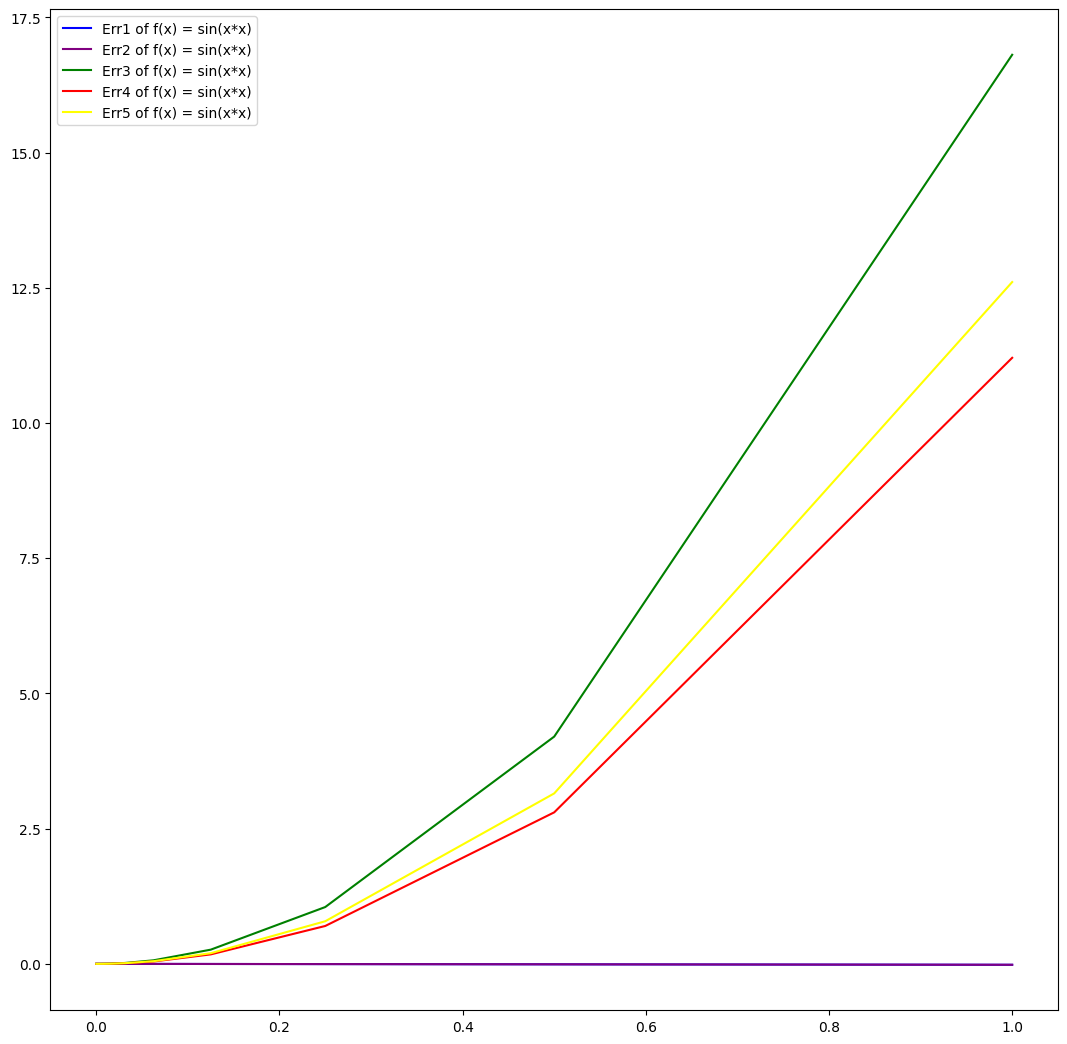

In [56]:
cols  = ['blue', 'purple', 'green', 'red', 'yellow']

size = 13
plt.figure (figsize=(size, size))

for i in range (0, len(y_data1)):

    plt.plot(x_data, y_data1[i], color = cols[i], label = 'Err' + str(i + 1) + ' of f(x) = sin(x*x)')
    plt.legend(loc='best')
    
    plt.show

In [58]:
#first function is f1(x) = sin(x^2) in log scale

x0 = math.pi/math.sqrt(3)

f1 = math.sin(x0 * x0)
f1_second_derivative = -0.03396949181671438
f1_third_derivative  = 50.428970649120224

y_data1_log = [[],[],[],[],[]]
y_data1_log[0] = method_err1_log(f1_second_derivative)
y_data1_log[1] = method_err2_log(f1_second_derivative)
y_data1_log[2] = method_err3_log(f1_third_derivative)
y_data1_log[3] = method_err4_log(f1_third_derivative)
y_data1_log[4] = method_err5_log(f1_third_derivative)


/var/folders/nt/r0jt467s3fn04_1p1x1f71wh0000gn/T/ipykernel_45882/369702069.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(second_derivative_result * x_data / 2)
/var/folders/nt/r0jt467s3fn04_1p1x1f71wh0000gn/T/ipykernel_45882/369702069.py:9: RuntimeWarning: invalid value encountered in log
  return np.log(second_derivative_result * x_data / 2)


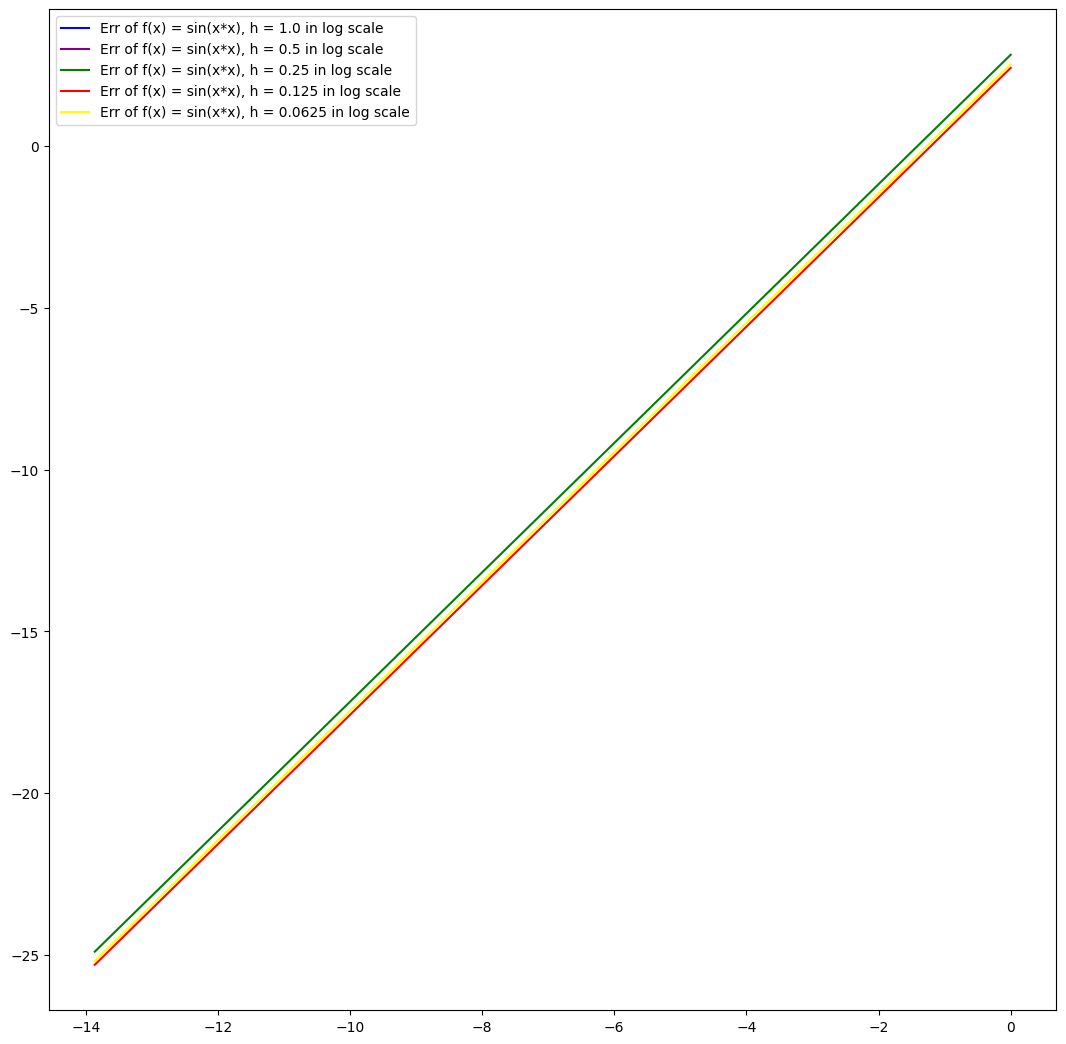

In [34]:
cols  = ['blue', 'purple', 'green', 'red', 'yellow']

size = 13
plt.figure (figsize=(size, size))

for i in range (0, len(y_data1)):

    plt.plot(np.log(x_data), y_data1_log[i], color = cols[i], label = 'Err of f(x) = sin(x*x), h = ' + str(x_data[i]) +  ' in log scale')
    plt.legend(loc='best')
    
    plt.show

## Function 2
 $$f_2(x) = cos(sin(x))$$

In [35]:
#second function is f2(x) = cos(sin(x))

x0 = math.pi/3

f2 = math.cos(math.sin(x0))
f2_second_derivative = 0.497738659279754
f2_third_derivative  = 1.3176939644672374

y_data2 = [[],[],[],[],[]]
y_data2[0] = method_err1(f2_second_derivative)
y_data2[1] = method_err2(f2_second_derivative)
y_data2[2] = method_err3(f2_third_derivative)
y_data2[3] = method_err4(f2_third_derivative)
y_data2[4] = method_err5(f2_third_derivative)

## Plot №1 in default scale

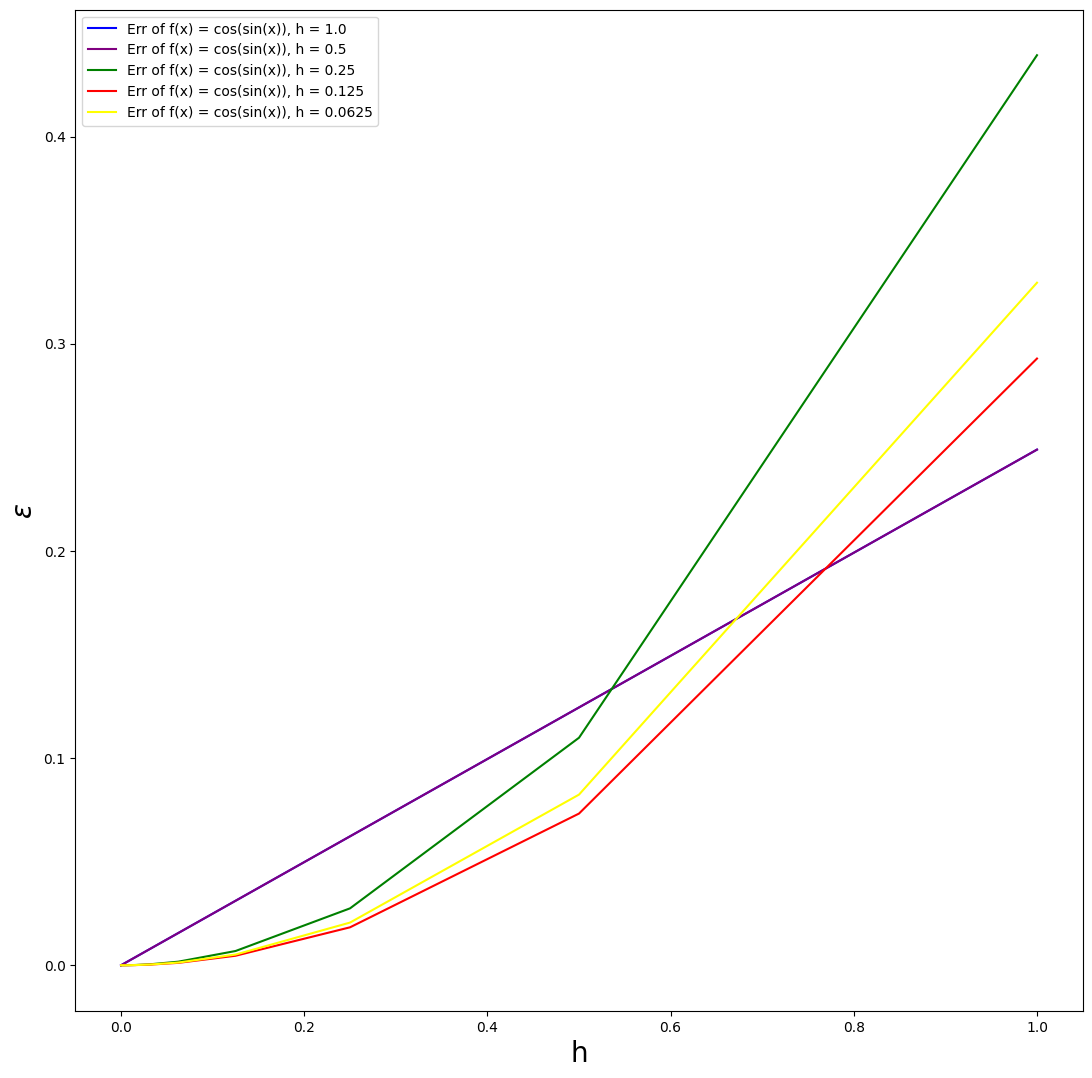

In [63]:
size = 13
plt.figure (figsize=(size, size))

ax = plt.gca ()
ax.set_xlabel (r"h", fontsize = 20)
ax.set_ylabel (r"$\epsilon$", fontsize = 20)

for i in range (0, len(y_data2)):

    plt.plot(x_data, y_data2[i], color = cols[i], label = 'Err of f(x) = cos(sin(x)), h = ' + str(x_data[i]))
    plt.legend(loc='best')
    

    plt.show

In [37]:
#second function is f2(x) = cos(sin(x)) in log scale

x0 = math.pi/3

f2 = math.cos(math.sin(x0))
f2_second_derivative = 0.497738659279754
f2_third_derivative  = 1.3176939644672374

y_data2_log = [[],[],[],[],[]]
y_data2_log[0] = method_err1_log(f2_second_derivative)
y_data2_log[1] = method_err2_log(f2_second_derivative)
y_data2_log[2] = method_err3_log(f2_third_derivative)
y_data2_log[3] = method_err4_log(f2_third_derivative)
y_data2_log[4] = method_err5_log(f2_third_derivative)


## Plot №1 in log scale

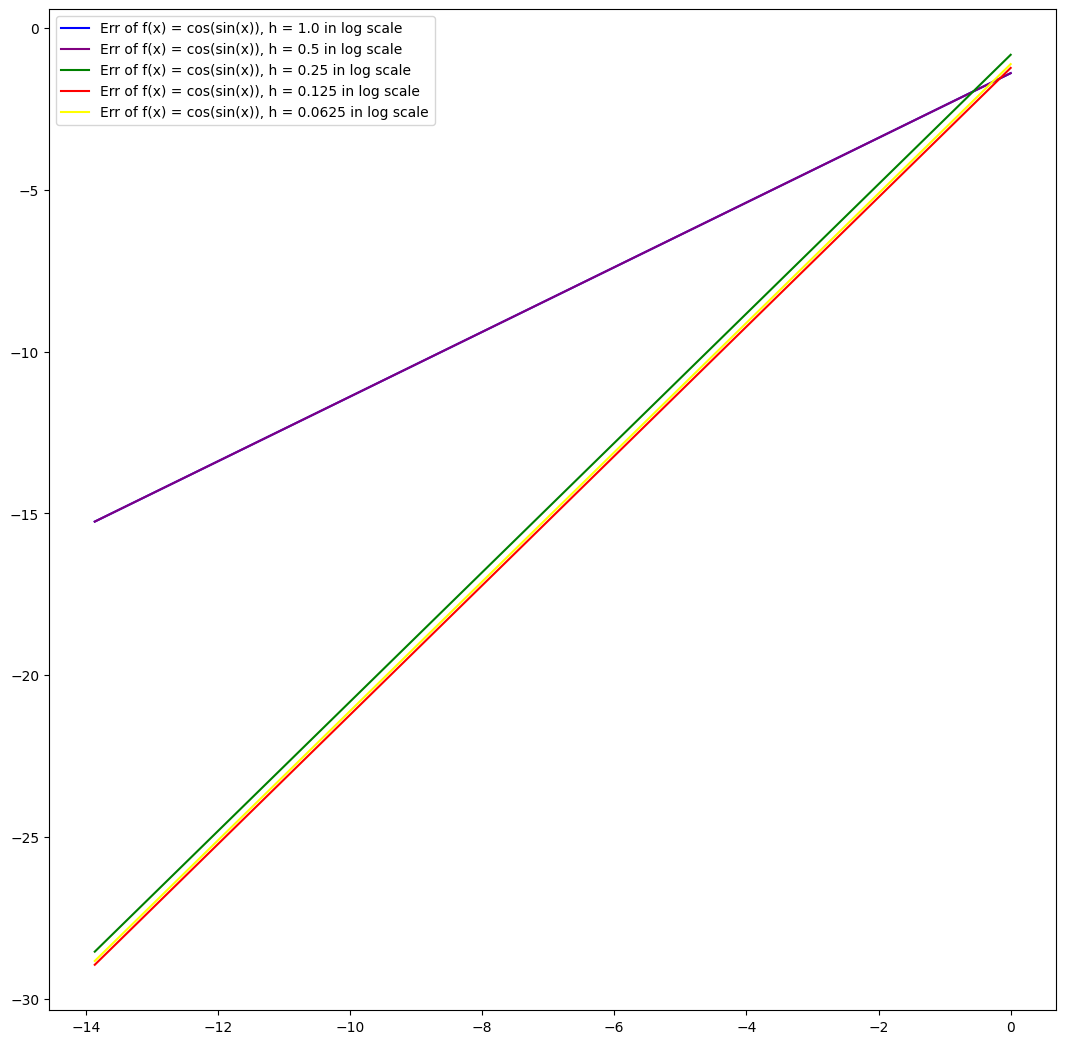

In [38]:
size = 13
plt.figure (figsize=(size, size))

for i in range (0, len(y_data2)):

    plt.plot(np.log(x_data), y_data2_log[i], color = cols[i], label = 'Err of f(x) = cos(sin(x)), h = ' + str(x_data[i]) +  ' in log scale')
    plt.legend(loc='best')

    plt.show

## Function 3
$$f_3(x) = e^{sin(cos(x))}$$

In [51]:
#third function is f3(x) = exp(sin(cos(x)))

x0 = math.pi/3

f3 = math.exp(math.sin(math.cos(x0)))
f3_second_derivative = 1.228692379422
f3_third_derivative  = 3.37326

y_data3 = [[],[],[],[],[]]
y_data3[0] = method_err1(f3_second_derivative)
y_data3[1] = method_err2(f3_second_derivative)
y_data3[2] = method_err3(f3_third_derivative)
y_data3[3] = method_err4(f3_third_derivative)
y_data3[4] = method_err5(f3_third_derivative)

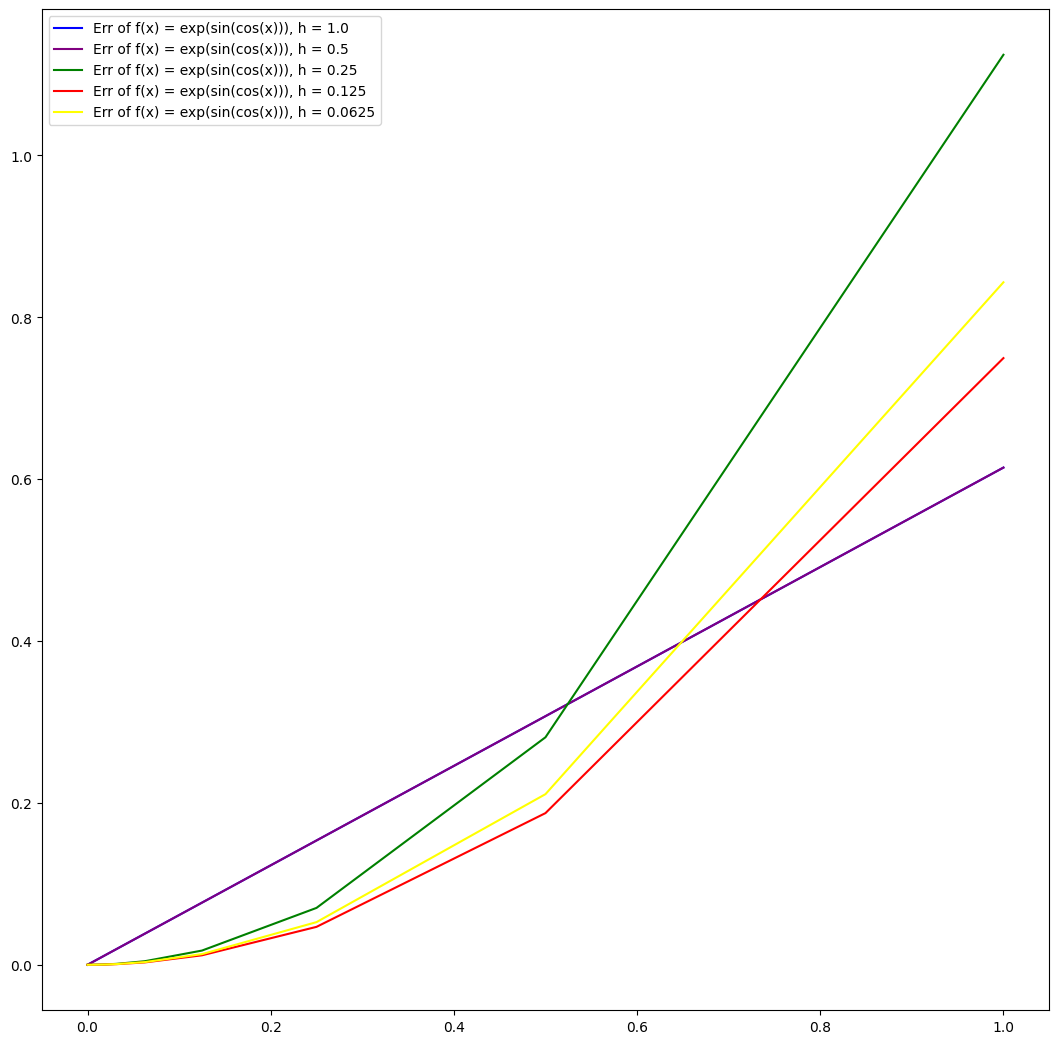

In [52]:
size = 13
plt.figure (figsize=(size, size))

for i in range (0, len(y_data3)):

    plt.plot(x_data, y_data3[i], color = cols[i], label = 'Err of f(x) = exp(sin(cos(x))), h = ' + str(x_data[i]))
    plt.legend(loc='best')

    plt.show

In [41]:
#first function is f3(x) = exp(sin(cos(x))) in log scale

x0 = math.pi/3

f3 = math.exp(math.sin(math.cos(x0)))
f3_second_derivative = 1.228692379422
f3_third_derivative  = 3.37326

y_data3_log = [[],[],[],[],[]]
y_data3_log[0] = method_err1_log(f3_second_derivative)
y_data3_log[1] = method_err2_log(f3_second_derivative)
y_data3_log[2] = method_err3_log(f3_third_derivative)
y_data3_log[3] = method_err4_log(f3_third_derivative)
y_data3_log[4] = method_err5_log(f3_third_derivative)

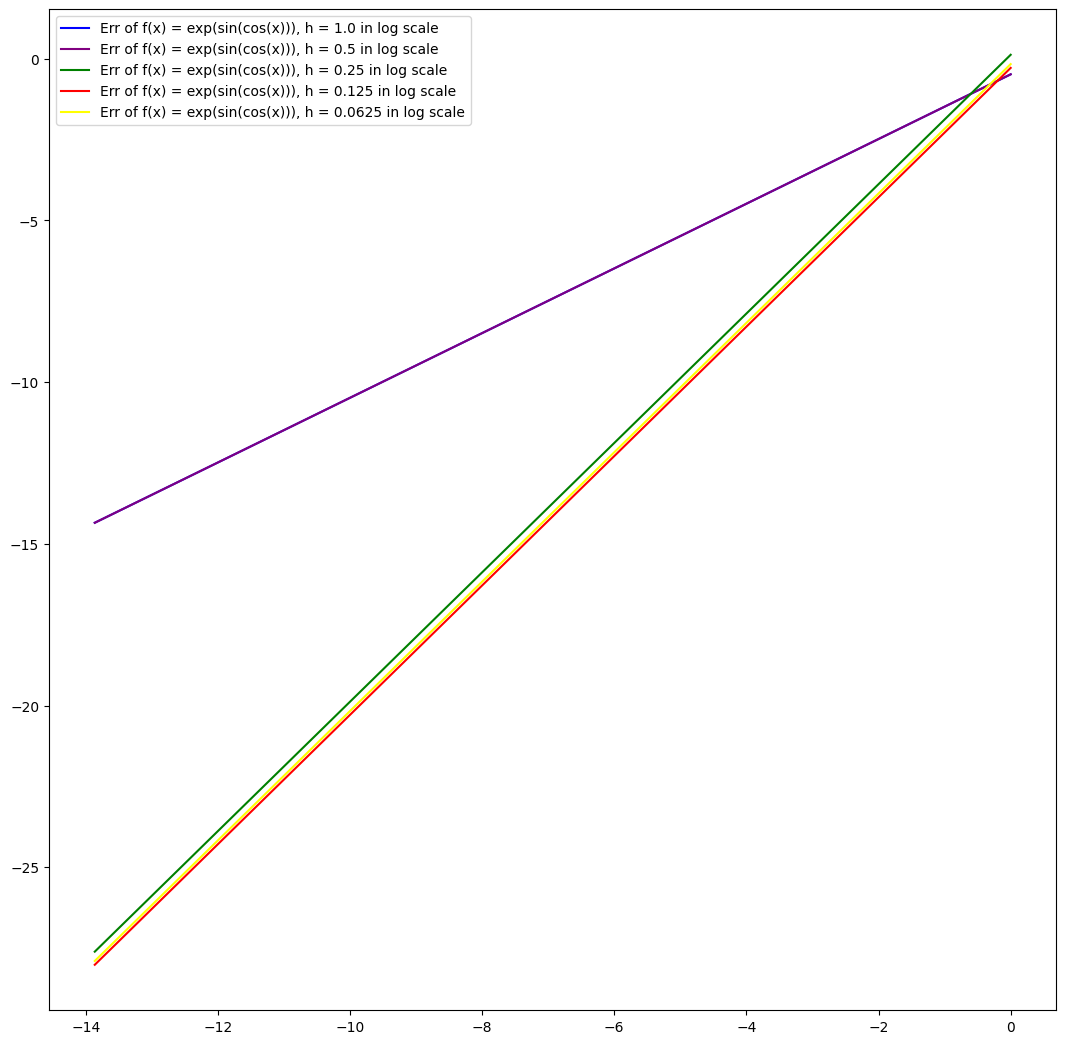

In [42]:
size = 13
plt.figure (figsize=(size, size))

for i in range (0, len(y_data3_log)):

    plt.plot(np.log(x_data), y_data3_log[i], color = cols[i], label = 'Err of f(x) = exp(sin(cos(x))), h = ' + str(x_data[i])+ ' in log scale')
    plt.legend(loc='best')

    plt.show

## Function 4
$$ f_4(x) = ln(x+3) $$

In [43]:
#function 4 in f4(x) = ln(x+3)

x0 = 2

f4 = np.log(x0+3)
f4_second_derivative = -0.04
f4_third_derivative  = 0.016

y_data4 = [[],[],[],[],[]]
y_data4[0] = method_err1(f4_second_derivative)
y_data4[1] = method_err2(f4_second_derivative)
y_data4[2] = method_err3(f4_third_derivative)
y_data4[3] = method_err4(f4_third_derivative)
y_data4[4] = method_err5(f4_third_derivative)

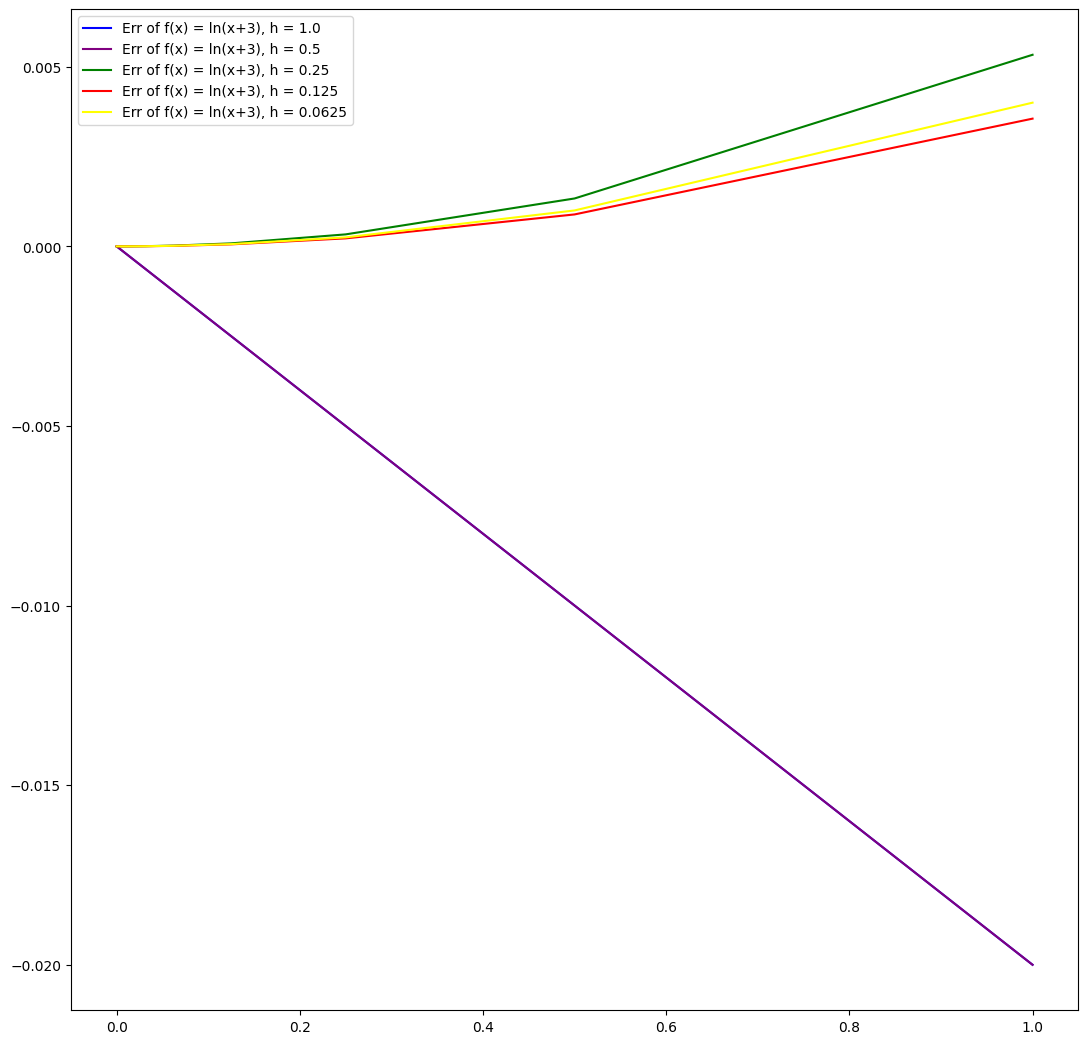

In [44]:
size = 13
plt.figure (figsize=(size, size))

for i in range (0, len(y_data4)):

    plt.plot(x_data, y_data4[i], color = cols[i], label = 'Err of f(x) = ln(x+3), h = ' + str(x_data[i]))
    plt.legend(loc='best')

    plt.show

In [45]:
#function 4 in f4(x) = ln(x+3) in log scale

x0 = 2

f4 = np.log(x0+3)
f4_second_derivative = -0.04
f4_third_derivative  = 0.016

y_data4_log = [[],[],[],[],[]]
y_data4_log[0] = method_err1_log(f4_second_derivative)
y_data4_log[1] = method_err2_log(f4_second_derivative)
y_data4_log[2] = method_err3_log(f4_third_derivative)
y_data4_log[3] = method_err4_log(f4_third_derivative)
y_data4_log[4] = method_err5_log(f4_third_derivative)

/var/folders/nt/r0jt467s3fn04_1p1x1f71wh0000gn/T/ipykernel_45882/369702069.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(second_derivative_result * x_data / 2)
/var/folders/nt/r0jt467s3fn04_1p1x1f71wh0000gn/T/ipykernel_45882/369702069.py:9: RuntimeWarning: invalid value encountered in log
  return np.log(second_derivative_result * x_data / 2)


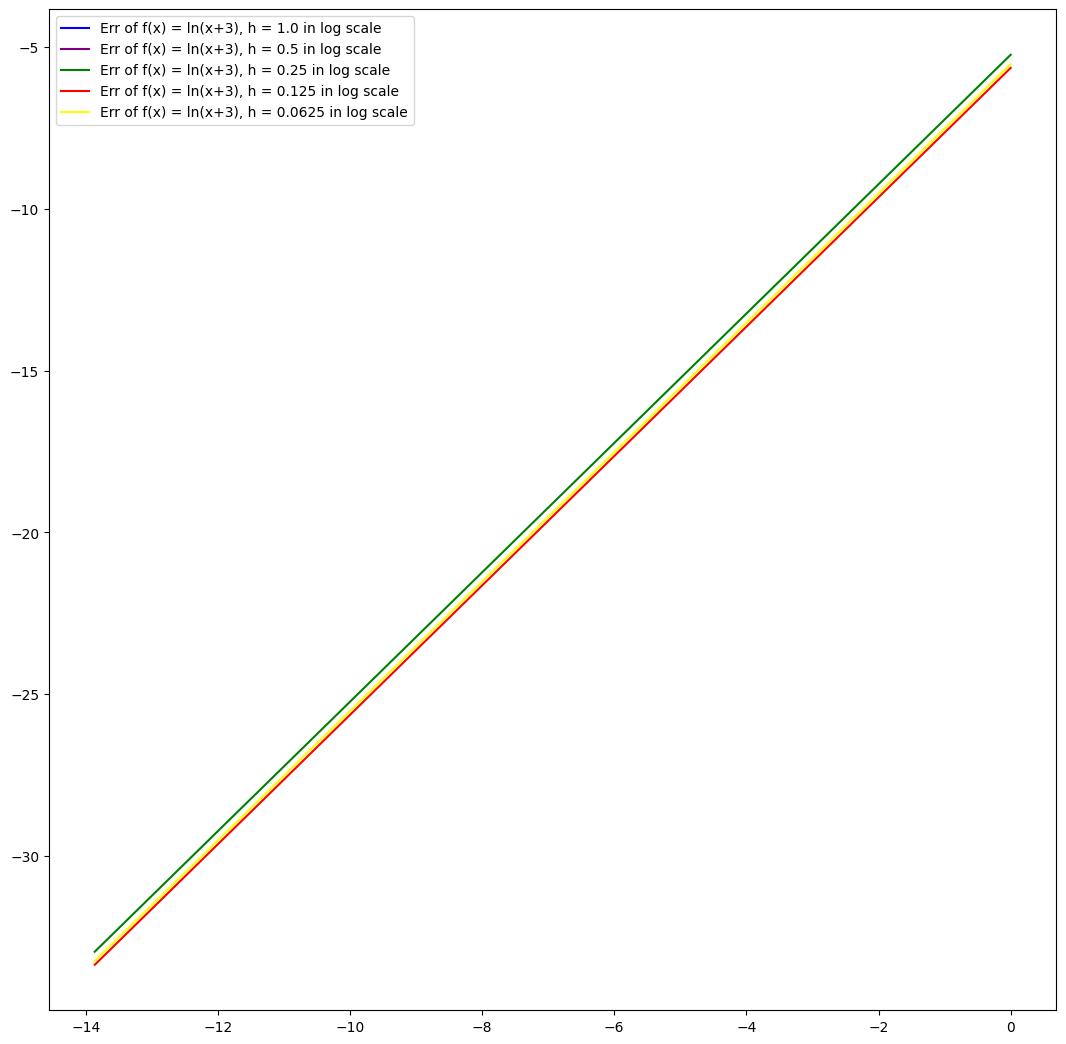

In [46]:
size = 13
plt.figure (figsize=(size, size))

for i in range (0, len(y_data4_log)):

    plt.plot(np.log(x_data), y_data4_log[i], color = cols[i], label = 'Err of f(x) = ln(x+3), h = ' + str(x_data[i])+ ' in log scale')
    plt.legend(loc='best')

    plt.show

## Function 5
$$f_5(x) = (x+3)^{0.5}$$

In [47]:
#function 5 is f5(x) = (x+3)^0.5

x0 = 5

f5 = (x0+3)**0.5
f5_second_derivative = -0.01104854
f5_third_derivative  = 0.0020716

y_data5 = [[],[],[],[],[]]
y_data5[0] = method_err1(f5_second_derivative)
y_data5[1] = method_err2(f5_second_derivative)
y_data5[2] = method_err3(f5_third_derivative)
y_data5[3] = method_err4(f5_third_derivative)
y_data5[4] = method_err5(f5_third_derivative)

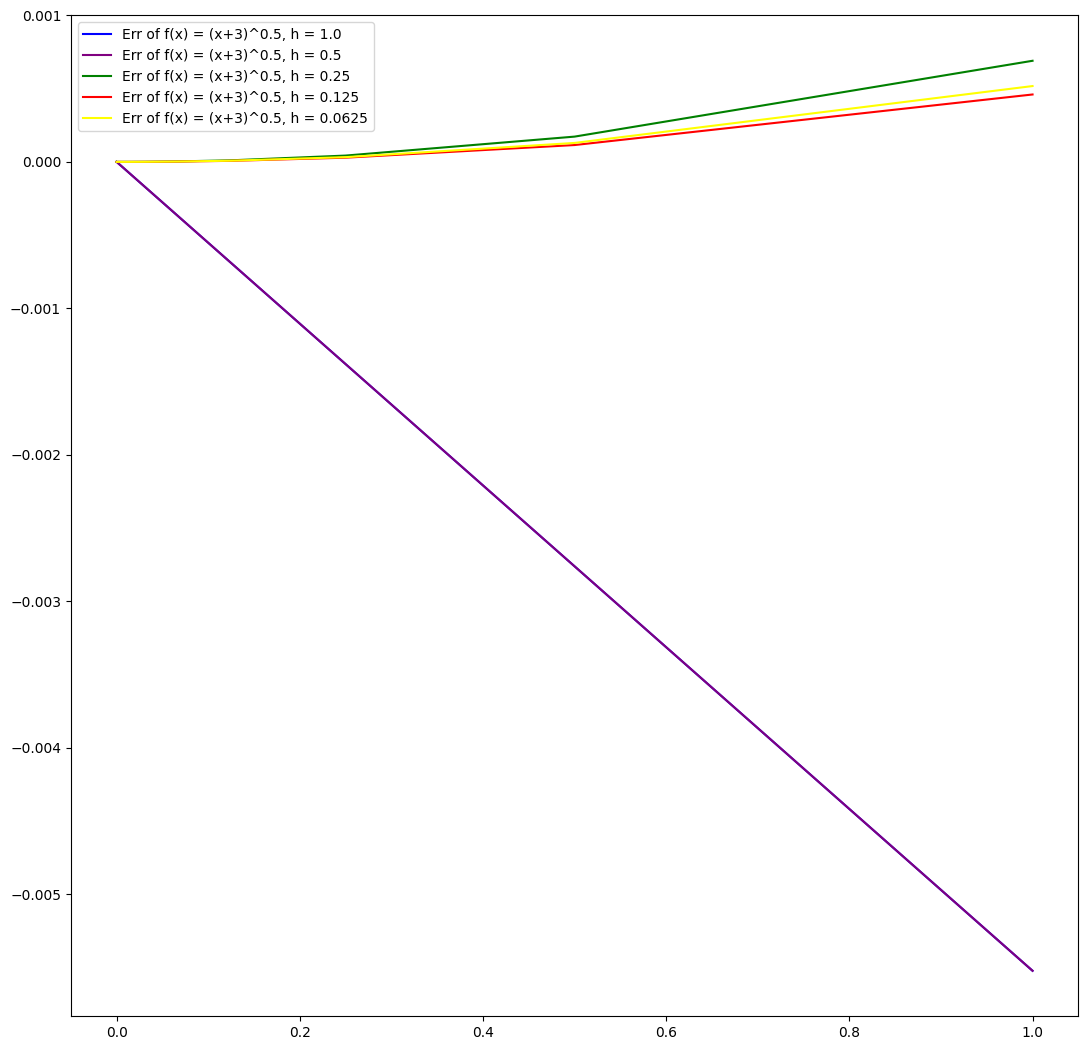

In [48]:
size = 13
plt.figure (figsize=(size, size))

for i in range (0, len(y_data5)):

    plt.plot(x_data, y_data5[i], color = cols[i], label = 'Err of f(x) = (x+3)^0.5, h = ' + str(x_data[i]))
    plt.legend(loc='best')

    plt.show

In [49]:
#function 5 in f5(x) = (x+3)^0.5

x0 = 5

f5 = (x0+3)**0.5
f5_second_derivative = -0.01104854
f5_third_derivative  = 0.0020716

y_data5_log = [[],[],[],[],[]]
y_data5_log[0] = method_err1_log(f5_second_derivative)
y_data5_log[1] = method_err2_log(f5_second_derivative)
y_data5_log[2] = method_err3_log(f5_third_derivative)
y_data5_log[3] = method_err4_log(f5_third_derivative)
y_data5_log[4] = method_err5_log(f5_third_derivative)

/var/folders/nt/r0jt467s3fn04_1p1x1f71wh0000gn/T/ipykernel_45882/369702069.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(second_derivative_result * x_data / 2)
/var/folders/nt/r0jt467s3fn04_1p1x1f71wh0000gn/T/ipykernel_45882/369702069.py:9: RuntimeWarning: invalid value encountered in log
  return np.log(second_derivative_result * x_data / 2)


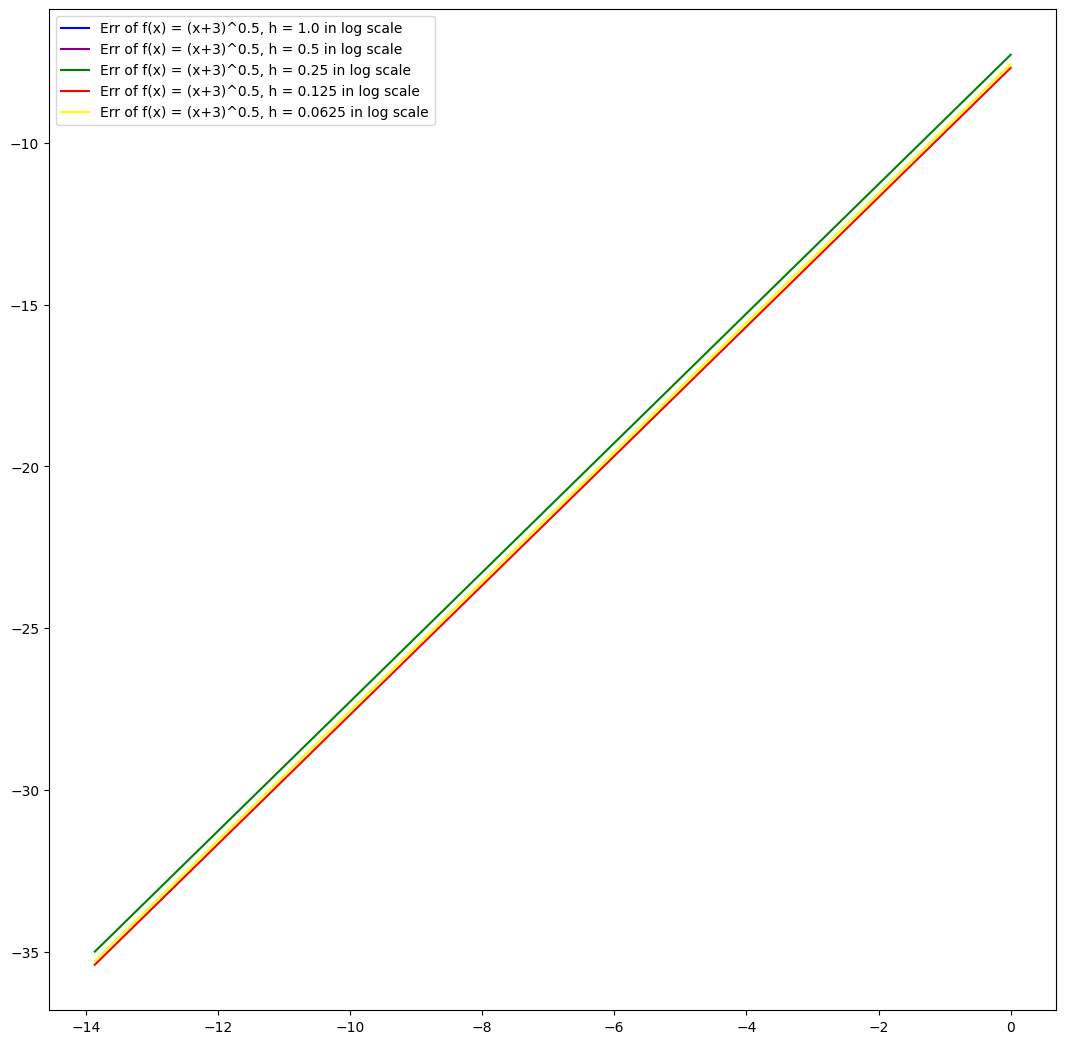

In [50]:
size = 13
plt.figure (figsize=(size, size))

for i in range (0, len(y_data4_log)):

    plt.plot(np.log(x_data), y_data5_log[i], color = cols[i], label = 'Err of f(x) = (x+3)^0.5, h = ' + str(x_data[i])+ ' in log scale')
    plt.legend(loc='best')

    plt.show